In [9]:
import pandas as pd 
import numpy as np 
import Functions as f
data = pd.read_excel("dataset.xlsx")

In [6]:
df = data.copy()
df = df.dropna()
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_5,6167.0,-0.803146,23.624403,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_6,6167.0,-0.803470,23.624144,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_8,6167.0,48.388890,36.388526,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,6167.0,48.289282,36.478009,0.000000,14.285714,50.000000,85.714286,100.000000
ind_10,6167.0,0.099609,60.414625,-100.000000,-50.000000,0.000000,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_426,6167.0,0.498188,0.228547,0.000000,0.323783,0.495192,0.675730,1.000000
ind_428,6167.0,0.490174,0.150483,0.083530,0.379894,0.487078,0.601508,0.868534
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694


In [11]:
dp = f.dataPreprocessing("dataset.xlsx")

In [13]:
df=dp.toDataFrame()

In [16]:
categoric_variables = dp.categoric_variables()

In [17]:
categoric_variables

['ind_109', 'ind_420', 'ind_422']

In [21]:
dms = pd.get_dummies(df['ind_109'])
dms.head()

y = df["90_target"]
X_ = df.drop(['90_target', 'ind_109', 'ind_420', 'ind_422'], axis=1).astype("float64")
X_.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-27.0,0.002371,2.0,-49.6,-54.0,1.0,0.498547,0.701906,15.135802,35.625252
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-31.0,0.003074,0.8,-55.6,-60.0,1.0,0.537088,0.690833,15.143348,35.643013
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-30.0,0.003561,2.7,-58.4,-60.0,1.0,0.615169,0.693040,15.146870,35.651301
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-30.0,0.004366,0.9,-61.8,-65.0,1.0,0.661517,0.673418,15.153283,0.000000
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-45.0,0.004198,0.1,-79.8,-86.0,1.0,0.747204,0.700522,-15.179065,-35.727079


In [22]:
X = pd.concat([X_, dms['GREEN']], axis=1)
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,GREEN
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54.0,1.0,0.498547,0.701906,15.135802,35.625252,1
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60.0,1.0,0.537088,0.690833,15.143348,35.643013,1
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60.0,1.0,0.615169,0.693040,15.146870,35.651301,1
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.004366,0.9,-61.8,-65.0,1.0,0.661517,0.673418,15.153283,0.000000,1
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.004198,0.1,-79.8,-86.0,1.0,0.747204,0.700522,-15.179065,-35.727079,1


In [23]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (4625, 133)
y_train (4625,)
X_test (1542, 133)
y_test (1542,)
training (6167, 136)


In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA()

In [25]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_train[:1,:]

array([[ 8.70031536e+00, -4.83014258e+00,  1.92331729e+00,
         1.76684137e+00, -2.03037526e+00,  1.40505751e+00,
        -1.17681648e+00, -2.96228456e-01, -1.85603906e+00,
        -5.71570622e-01,  4.18223724e-01, -6.70146562e-02,
         1.04701850e+00, -6.73719537e-01, -1.15541338e+00,
        -4.42153650e-01,  7.51289187e-01, -1.86231994e-01,
         1.75522339e+00,  4.97056615e-02, -1.56392272e+00,
         7.07674972e-01,  1.75979682e+00,  1.07082803e-01,
         1.65746373e+00, -5.73254264e-01, -1.61033444e-01,
         4.11122027e-01, -6.04661638e-01,  8.46330808e-01,
         2.72845835e-01, -9.51593097e-01,  3.95092476e-01,
        -4.36958068e-01,  2.65151386e-01, -9.05245270e-01,
         2.91419481e-01, -2.71186050e-01,  9.80425858e-01,
        -5.95362551e-01,  9.94133094e-01, -2.18109705e-01,
        -1.06800301e+00, -4.93913086e-01, -1.71882364e-02,
         3.37094116e-01,  5.93153880e-01,  5.21597524e-01,
         6.88948339e-01, -5.14634283e-01, -5.93833799e-0

In [44]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[:10]

array([36.46, 48.63, 54.68, 59.05, 62.15, 65.11, 67.78, 69.78, 71.48,
       73.12])

In [53]:
pca.explained_variance_ratio_[:10]

array([0.36456878, 0.12173897, 0.06053943, 0.04372461, 0.03102272,
       0.02956899, 0.02665551, 0.02002458, 0.0169727 , 0.01637548])

([<matplotlib.axis.XTick at 0xd1ce658>,
 <a list of 133 Text major ticklabel objects>)

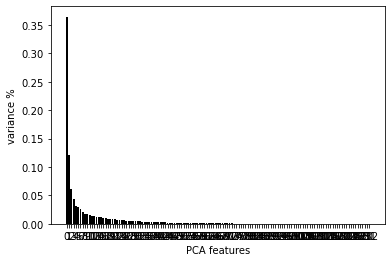

In [43]:
import matplotlib.pyplot as plt 

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [95]:
from sklearn.linear_model import LinearRegression
pca = PCA(n_components=20)
X_reduced_train = pca.fit_transform(scale(X_train))
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)

In [83]:
pcr_model.intercept_

-3.2848564454508056

In [84]:
pcr_model.coef_

array([ -0.29281563,   0.47002865,   1.16394909,   1.42716833,
        -0.80003877,  -0.85557255,  -0.03367606,  -0.08938797,
         1.40327579,  -5.10749621,   3.84797997,  -1.29872275,
        -4.52371544,  -8.99494275,   1.55973658,   3.78589252,
        -8.56541876, -15.10105625,   8.36301955,   4.46379191])

In [85]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[:5]

array([  6.7285162 ,  -6.96173883,  28.84126381, -10.95764277,
       -24.87369372])

In [86]:
from sklearn.metrics import mean_squared_error, r2_score

np.sqrt(mean_squared_error(y_train, y_pred))

22.914354946740968

In [87]:
df['90_target'].mean()

-3.315072358419004

In [89]:
r2_score(y_train, y_pred)

0.6136083439194524

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
r2_scores=[]
for n in range(1,50):
    pca = PCA(n_components=n)
    X_reduced_train = pca.fit_transform(scale(X_train))
    lm2 = LinearRegression()
    pcr_model2 = lm2.fit(X_reduced_train, y_train)
    y_pred = pcr_model2.predict(X_reduced_train)
    r2_scores.append(r2_score(y_train, y_pred))
r2_scores

[0.00305937069238027,
 0.0056917188356080395,
 0.013718897981609302,
 0.022433057619951624,
 0.024379437261128678,
 0.02645445566857374,
 0.026466110552102795,
 0.026526836335823867,
 0.029578111106329574,
 0.07099382513226049,
 0.09370279186974417,
 0.09622958697527406,
 0.12309113598512444,
 0.22489950988278462,
 0.2248117445903287,
 0.23280114747061398,
 0.3136644817406725,
 0.5567973107572082,
 0.5946620588957134,
 0.6236765048929167,
 0.6238787377502496,
 0.6146225391894242,
 0.6336128208944103,
 0.6267233705663353,
 0.6413755783995754,
 0.6410871436521406,
 0.649928170705643,
 0.6445813957011999,
 0.6919163700673288,
 0.6797452890435529,
 0.7010682889524927,
 0.852784857482222,
 0.8595005596601456,
 0.870249614597149,
 0.8686267250712446,
 0.8740019096549545,
 0.877770973089165,
 0.880696505003272,
 0.8786045355372717,
 0.8805468082055912,
 0.8817923274236537,
 0.8883537466320381,
 0.888703946554838,
 0.888313430975615,
 0.8883795807547415,
 0.8894993162256628,
 0.889904343168684

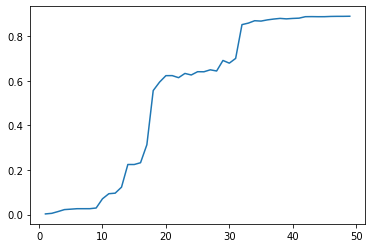

In [106]:
plt.plot(range(1,50), r2_scores)

In [90]:
pca2 = PCA()
X_reduced_test = pca2.fit_transform(scale(X_test))
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_test, y_test)

y_pred = pcr_model.predict(X_reduced_test)

np.sqrt(mean_squared_error(y_test, y_pred))

12.114067406721064

Text(0.5, 0, 'PCA 2')

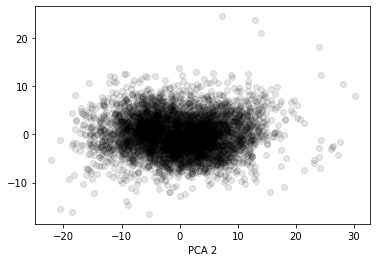

In [91]:
X_reduced_train = pca.fit_transform(scale(X_train))
PCA_components = pd.DataFrame(X_reduced_train)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.xlabel('PCA 2')